In [43]:
from fastcore.all import *
import sys
sys.path.append("..")
import wandb
from fastcore import test
import pandas as pd
import numpy as np
from timecluster_extension.load import *
from timecluster_extension.dr import *
from timecluster_extension.visualization import *
from tensorflow.keras.optimizers import Adam
import wandb
from wandb.keras import WandbCallback
from yaml import load, FullLoader
from fastcore.utils import Path
from datetime import datetime
import pickle
import matplotlib.pyplot as plt


Load a wandb run

In [4]:
run_wandb = wandb.init(entity = "pacmel",
                      project="timecluster-extension",
                      job_type='train_DCAE',
                      allow_val_change=True,
                      resume=False)
config = wandb.config 

wandb: Currently logged in as: pacmel (use `wandb login --relogin` to force relogin)


Load artifacts:

In [8]:
artifact_train = 'JNK:train_10days'
artifact_validation = 'JNK:validation_2days'
artifact_test = 'JNK:test_2days'

In [14]:
ds_train_artifact = run_wandb.use_artifact(artifact_train)
ds_validation_artifact = run_wandb.use_artifact(artifact_validation)
ds_test_artifact = run_wandb.use_artifact(artifact_test)

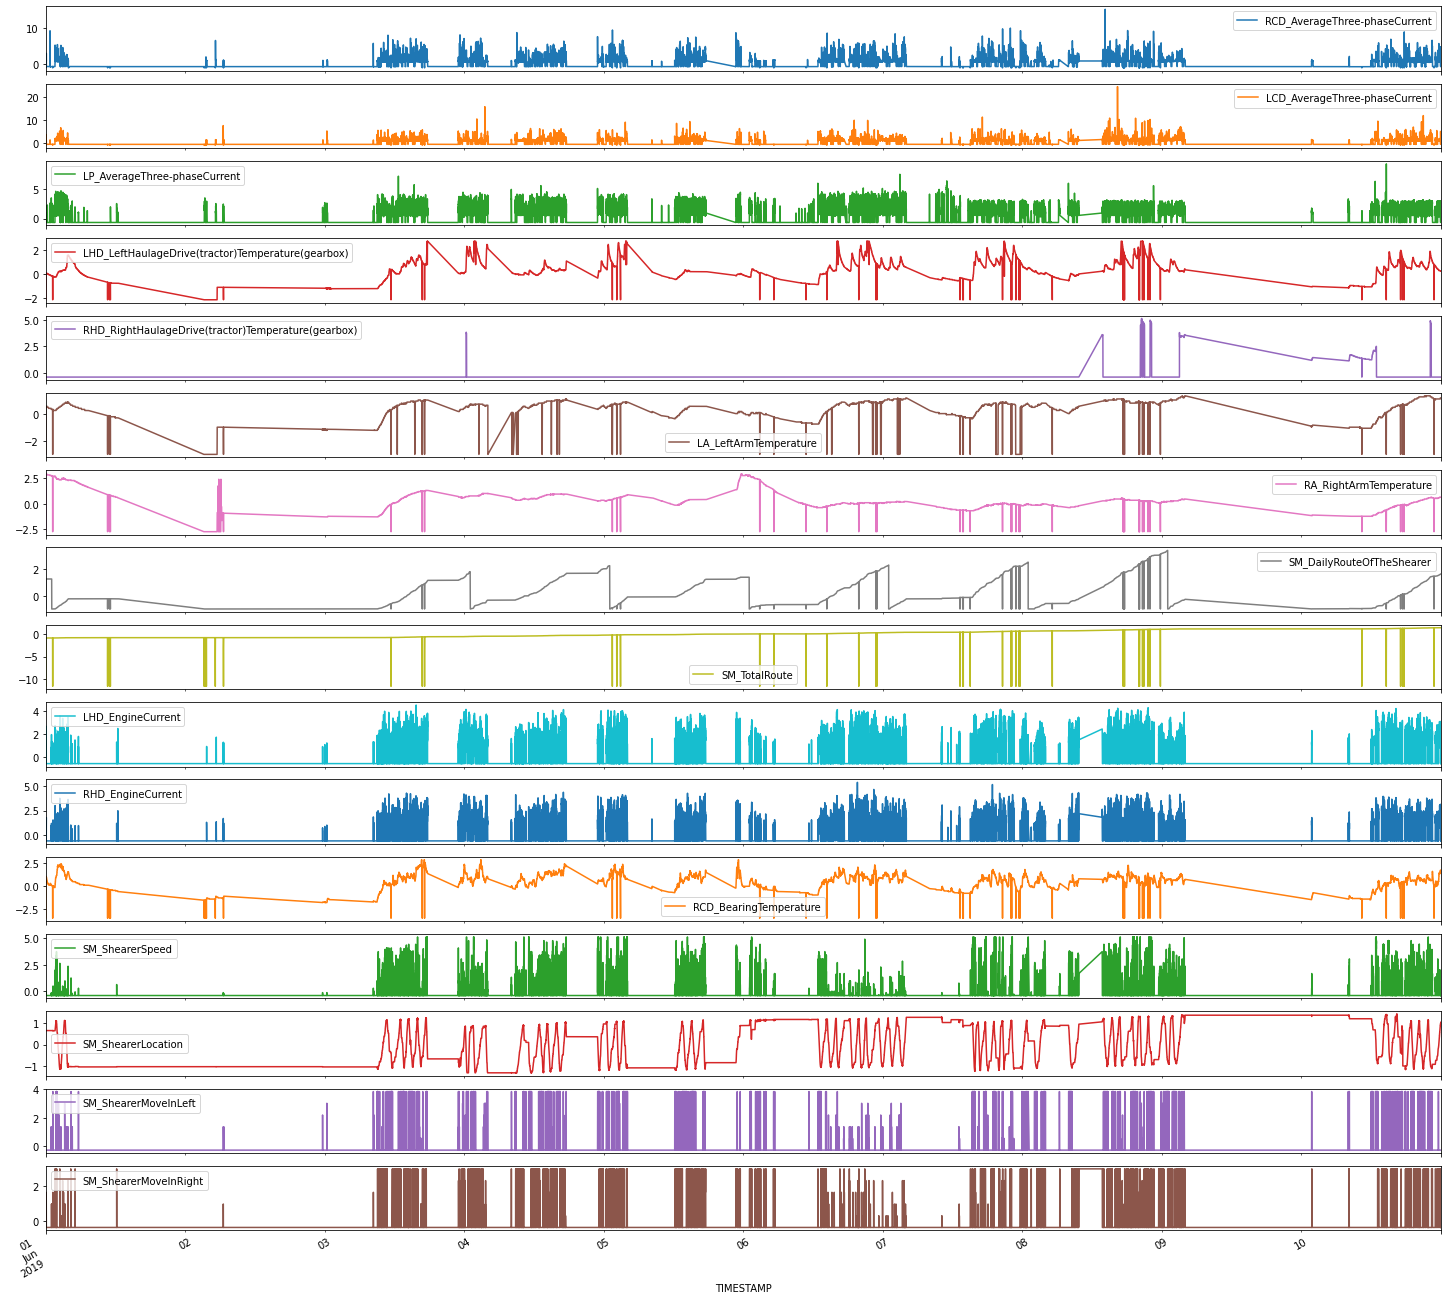

In [62]:
plot_TS(ds_train_artifact.to_df(),figsize=(25,25))

Mean and std of non-normalized artifacts

In [37]:
df_validation_artifact = ds_validation_artifact.to_df()
df_test_artifact= ds_test_artifact.to_df()

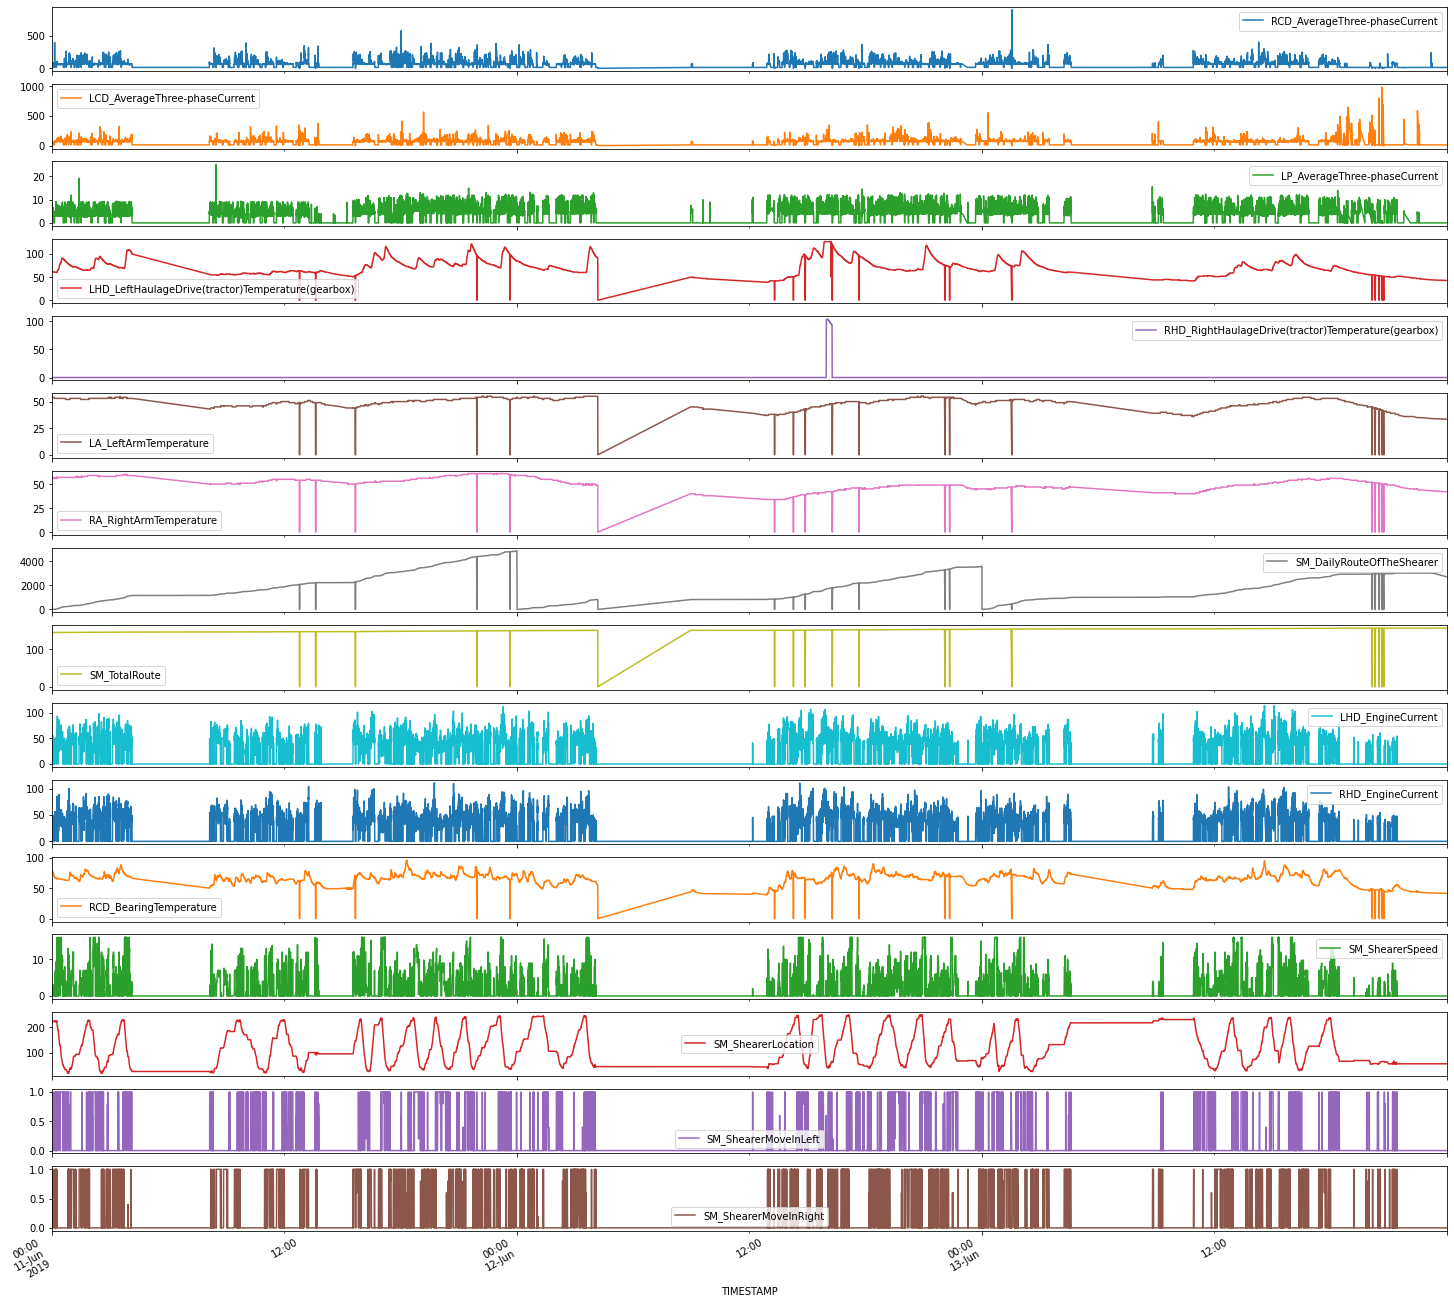

In [59]:
plot_TS(df_validation_artifact,figsize=(25,25))

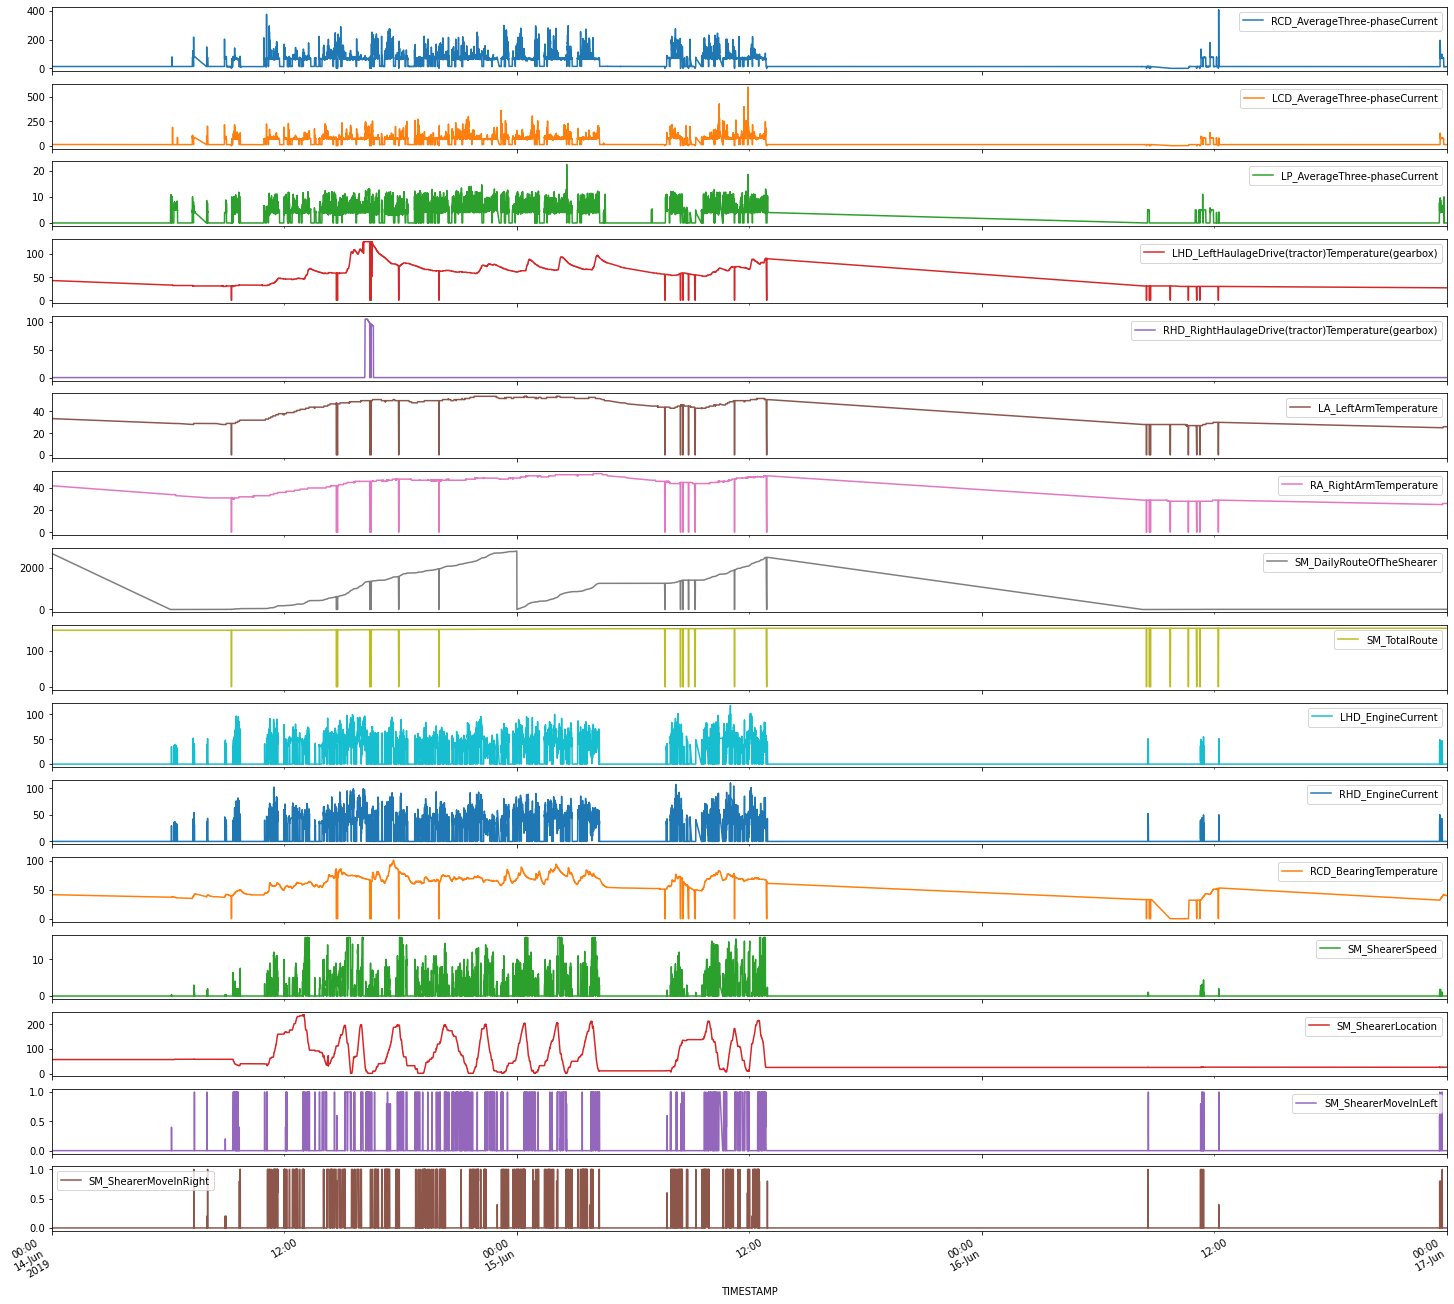

In [58]:
plot_TS(df_test_artifact,figsize=(25,25))

In [38]:
stats_test = df_test_artifact.agg([np.mean, np.std]).T
stats_validation = df_validation_artifact.agg([np.mean, np.std]).T


<AxesSubplot:title={'center':'plot'}>

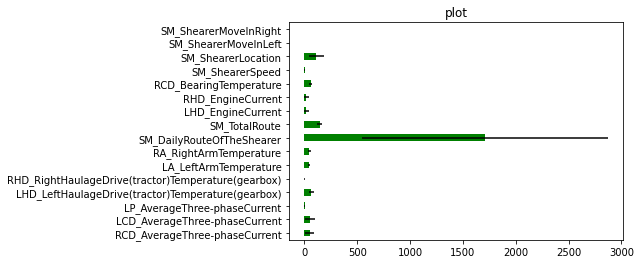

In [41]:
stats_validation.plot(kind = "barh", y = "mean", legend = False,  
          xerr = "std", title = "plot", color='green')

<AxesSubplot:title={'center':'plot'}>

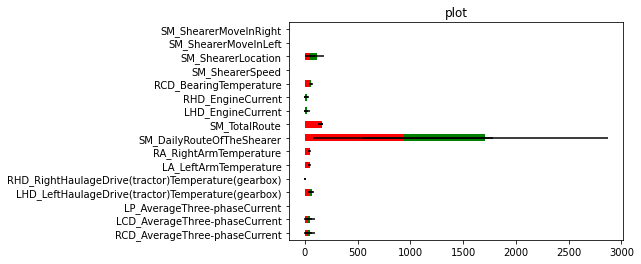

In [47]:
ax = stats_validation.plot(kind = "barh", y = "mean", legend = False,  
          xerr = "std", title = "plot", color='green')
stats_test.plot(ax=ax,kind = "barh", y = "mean", legend = False,  
          xerr = "std", title = "plot", color='red' )

In [ ]:
fig = plt.figure()

for frame in [stats_validation, newdf2, newdf3, newdf4, newdf5]:
    plt.plot(frame['Time'], frame['Data'])

plt.xlim(0,18000)
plt.ylim(0,30)
plt.show()

Transform to pandas dataframe

In [15]:
df_train_artifact = ds_train_artifact.to_df()
df_validation_artifact_norm = normalize_artifact(ds_validation_artifact, ds_train_artifact)
df_test_artifact_norm = normalize_artifact(ds_test_artifact, ds_train_artifact)

Artifacts are compatible.
Artifacts are compatible.


In [29]:
stats_train = df_train_artifact.agg([np.mean, np.std]).T
stats_validation_norm = df_validation_artifact_norm.agg([np.mean, np.std]).T
stats_test_norm = df_test_artifact_norm.agg([np.mean, np.std]).T


<AxesSubplot:>

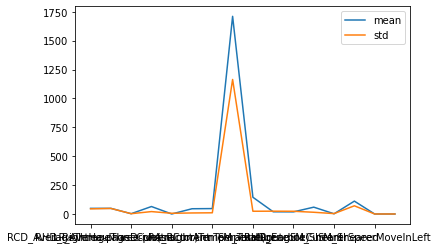

In [44]:
stats_validation.plot()